### Project Idea

Constructing a model (e.g Lotka-Volterra, agent based) which will predict the prey-predator ratio at time t. Search for optimal parameters with for example gridsearch. Compare the model the real life data. 30.5 presentation, mid june deadline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

algae = ' algae (10^6 cells/ml)'
rotifers =  ' rotifers (animals/ml)'

In [3]:

c_list = ['C' + str(c) for c in range(1,11) ]

data = {}

for C in c_list:
    data[C] = pd.read_csv(('data/{}.csv').format(C))

columns = []

for col in data['C1'].columns:
    columns.append(col)
columns

['time (days)',
 ' algae (10^6 cells/ml)',
 ' rotifers (animals/ml)',
 ' egg-ratio',
 ' eggs (per ml)',
 ' dead animals (per ml)',
 ' external medium (mu mol N / l)']

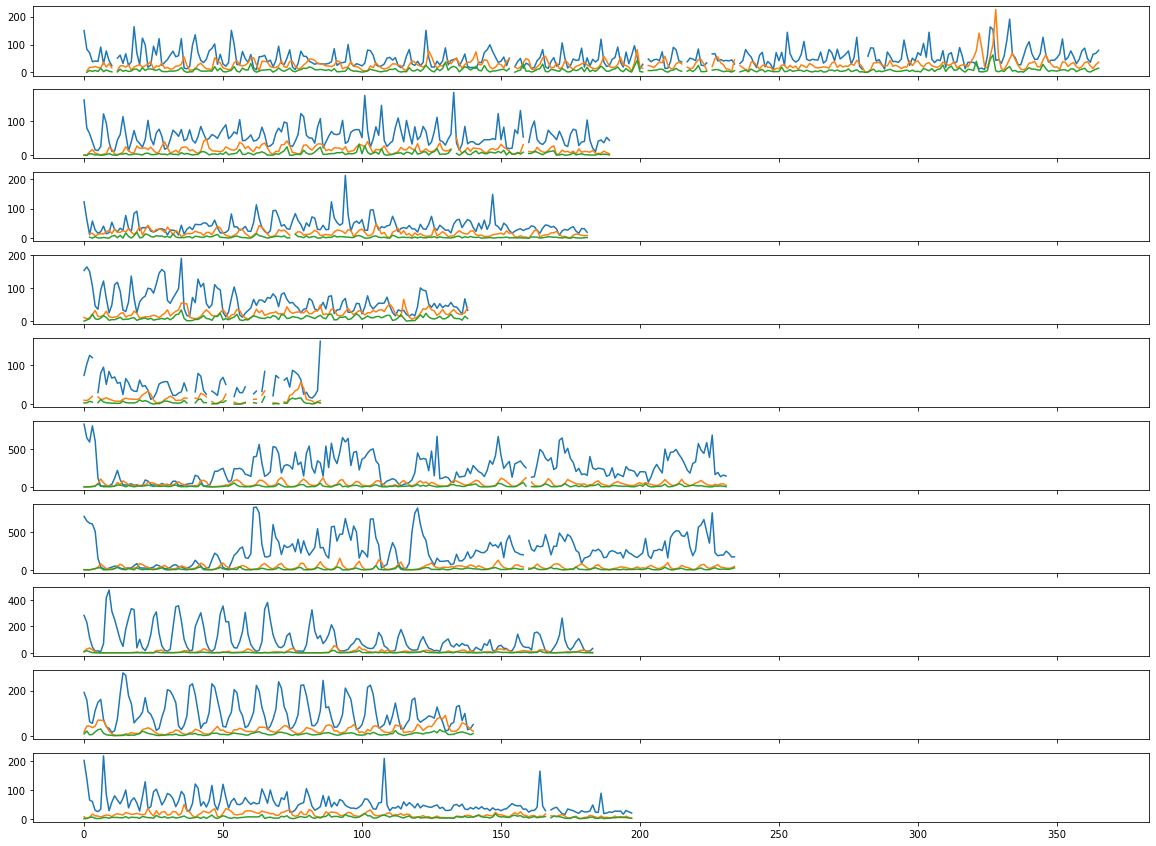

In [50]:
fig, axs = plt.subplots(10, figsize = (20,15), sharex = True)
    
for i, C in enumerate(c_list):
    axs[i].plot(data[C][' algae (10^6 cells/ml)'] * 100) # ! 10^4 !
    axs[i].plot(data[C][' rotifers (animals/ml)'])
    axs[i].plot(data[C][' eggs (per ml)'])
    
    
plt.show()

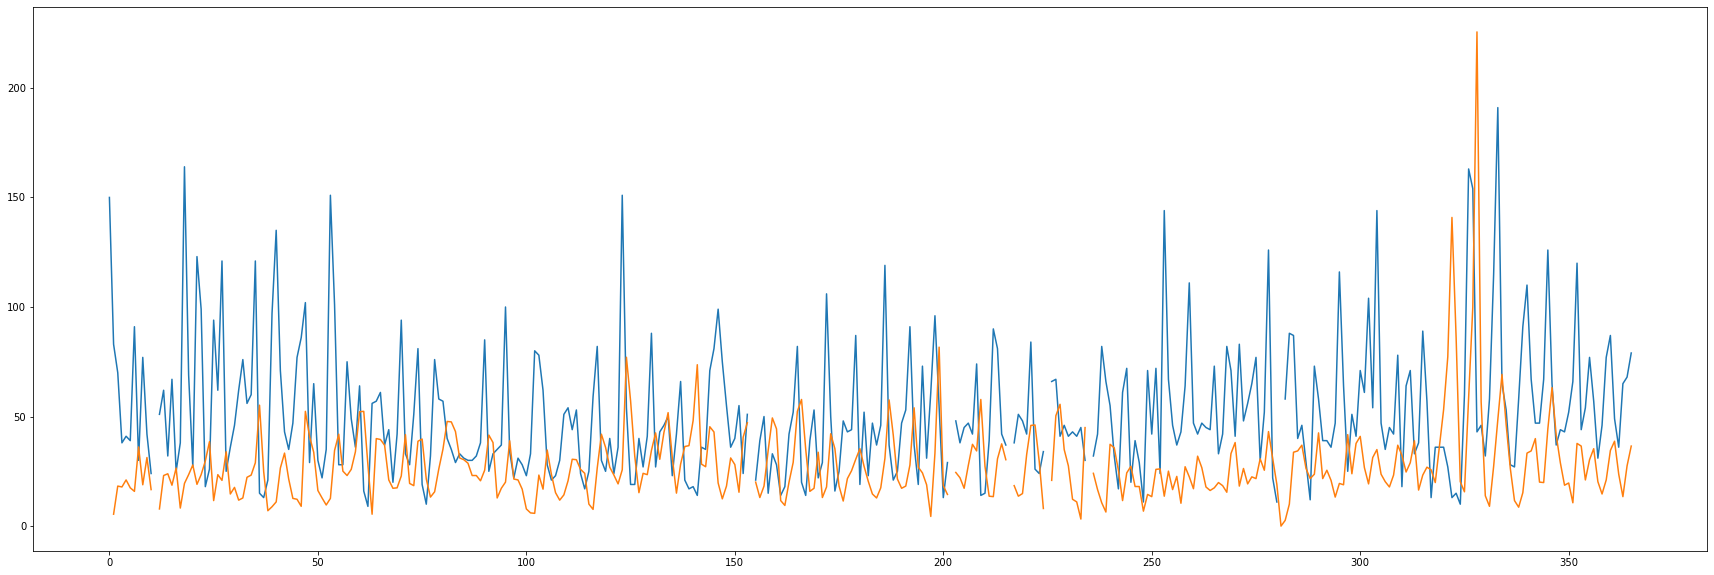

In [54]:
fig, axs = plt.subplots(1, figsize = (30,10))

axs.plot(data['C1'][' algae (10^6 cells/ml)'] * 100) # ! 10^4 !
axs.plot(data['C1'][' rotifers (animals/ml)'])

In [104]:
# nan values SUM

na_sum_algae = {}
na_sum_rotifers = {}

for C in c_list:
    na_sum_algae[C] = (data[C][' algae (10^6 cells/ml)'].isna().sum())
    na_sum_rotifers[C] = (data[C][' rotifers (animals/ml)'].isna().sum())
                            
    
print(na_sum_algae)
print(na_sum_rotifers)

{'C1': 7, 'C2': 1, 'C3': 0, 'C4': 0, 'C5': 12, 'C6': 1, 'C7': 1, 'C8': 0, 'C9': 0, 'C10': 1}
{'C1': 7, 'C2': 2, 'C3': 2, 'C4': 0, 'C5': 12, 'C6': 1, 'C7': 1, 'C8': 0, 'C9': 0, 'C10': 1}


In [115]:

na_index_algae = {}
na_index_rotifers = {}

for C in c_list:
    indeces = []
    for i, NaN in enumerate(data[C][algae].isna()):
        if NaN == True:
            indeces.append(i)
    na_index_algae[C] = indeces

for C in c_list:
    indeces = []
    for i, NaN in enumerate(data[C][rotifers].isna()):
        if NaN == True:
            indeces.append(i)
    na_index_rotifers[C] = indeces

na_index_rotifers

{'C1': [0, 11, 154, 202, 216, 225, 235],
 'C2': [133, 159],
 'C3': [1, 75],
 'C4': [],
 'C5': [4, 38, 39, 45, 52, 53, 59, 60, 63, 66, 67, 71],
 'C6': [160],
 'C7': [159],
 'C8': [],
 'C9': [],
 'C10': [167]}

In [119]:
# initial populations

init_pop = np.zeros((len(c_list),2))

for i,C in enumerate(c_list):
    
    x = data[C][' algae (10^6 cells/ml)'][0]
    y = data[C][' rotifers (animals/ml)'][0]
    
    if math.isnan(y) == True:
        x = data[C][' algae (10^6 cells/ml)'][1]
        y = data[C][' rotifers (animals/ml)'][1]
    
    initial = np.array([float(x),float(y)])
    init_pop[i] = initial


array([[ 0.83,  5.42],
       [ 1.63,  0.6 ],
       [ 1.23,  7.42],
       [ 1.54, 11.04],
       [ 0.73,  9.83],
       [ 8.21,  3.41],
       [ 7.04,  5.02],
       [ 2.83, 11.04],
       [ 1.92, 16.25],
       [ 2.03,  6.82]])

### Lotka Volterra
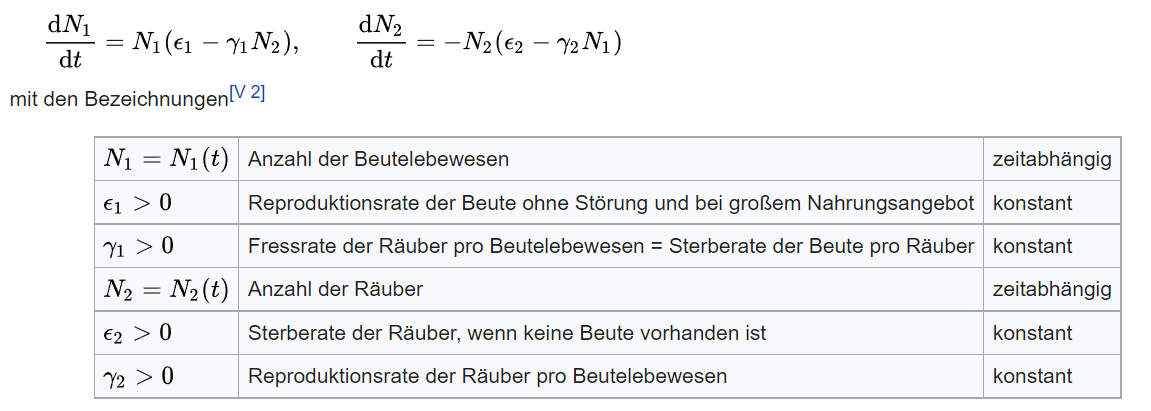


In [ ]:

def Lotka_Volterra(initial_pop, params):
    init_algae, init_rotifer = initial_pop
    e1, g1, e2, g2 = params
    

growth as function time and additional factors such as nutrients...
death factor oof predator coudl be influenced externally,
Nelda-Mead numerical iteration to find parameters
--> fitting with a set of diff equations

In [4]:
data['C1'].head()

,time (days),algae (10^6 cells/ml),rotifers (animals/ml),egg-ratio,eggs (per ml),dead animals (per ml),external medium (mu mol N / l)
0,0.00,1.50,NaN,NaN,NaN,NaN,80.0
1,0.95,0.83,5.42,0.00,0.00,0.4,80.0
2,2.26,0.70,18.26,0.38,7.02,0.0,80.0
3,2.91,0.38,17.86,0.19,3.41,0.4,80.0
4,3.95,0.41,21.07,0.32,6.82,0.4,80.0
